In [1]:
import bregnn.ffwd as ffwd 

Using TensorFlow backend.


In [2]:
import bregnn.io as io
reload(io)

<module 'bregnn.io' from '/users/musella/HHbbgg_ETH/bregression/notebooks/bregnn/io.py'>

In [3]:
import os

features = ['Jet_pt',
 'Jet_eta',
 'rho',
 'Jet_mt',
 'Jet_leadTrackPt',
 'Jet_leptonPtRel',
 'Jet_leptonDeltaR',
 'Jet_neHEF',
 'Jet_neEmEF',
 'Jet_vtxPt',
 'Jet_vtxMass',
 'Jet_vtx3dL',
 'Jet_vtxNtrk',
 'Jet_vtx3deL',
 'Jet_energyRing_dR0_em_Jet_e',
 'Jet_energyRing_dR1_em_Jet_e',
 'Jet_energyRing_dR2_em_Jet_e',
 'Jet_energyRing_dR3_em_Jet_e',
 'Jet_energyRing_dR4_em_Jet_e',
 'Jet_energyRing_dR0_neut_Jet_e',
 'Jet_energyRing_dR1_neut_Jet_e',
 'Jet_energyRing_dR2_neut_Jet_e',
 'Jet_energyRing_dR3_neut_Jet_e',
 'Jet_energyRing_dR4_neut_Jet_e',
 'Jet_energyRing_dR0_ch_Jet_e',
 'Jet_energyRing_dR1_ch_Jet_e',
 'Jet_energyRing_dR2_ch_Jet_e',
 'Jet_energyRing_dR3_ch_Jet_e',
 'Jet_energyRing_dR4_ch_Jet_e',
 'Jet_energyRing_dR0_mu_Jet_e',
 'Jet_energyRing_dR1_mu_Jet_e',
 'Jet_energyRing_dR2_mu_Jet_e',
 'Jet_energyRing_dR3_mu_Jet_e',
 'Jet_energyRing_dR4_mu_Jet_e',
 'Jet_numDaughters_pt03']

columns = features + ['Jet_mcPt']

base_dir = os.environ['SCRATCH'] + '/bregression'

data = io.read_data(base_dir+'/ttbar_unweighted_full80M_selected_test.hd5', columns = columns )

In [26]:
reload(ffwd)

X = data[features].values
y = (data['Jet_mcPt']/data['Jet_pt']).values.reshape(-1,1)

y_mean = np.median(y)#.mean()
y_std = y.std()

print(y_mean,y_std)

reg = ffwd.FFWDRegression('ffwd',X.shape[1:],const_output_biases=np.array([y_mean,y_std/y_mean]))
# reg = ffwd.FFWDRegression('ffwd',X.shape[1:],loss='mse')#const_output_biases=np.array([y_mean]),loss='mse')

model = reg(True)

1.01896 0.277835


In [27]:
# ?Input

In [28]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ffwd_inp (InputLayer)        (None, 35)                0         
_________________________________________________________________
ffwd_bn0 (BatchNormalization (None, 35)                140       
_________________________________________________________________
ffwd_dense1 (Dense)          (None, 256)               8960      
_________________________________________________________________
ffwd_bn1 (BatchNormalization (None, 256)               1024      
_________________________________________________________________
ffwd_do1 (Dropout)           (None, 256)               0         
_________________________________________________________________
ffwd_act1_lrelu (LeakyReLU)  (None, 256)               0         
_________________________________________________________________
ffwd_dense2 (Dense)          (None, 256)               65536     
__________

In [29]:
from keras.optimizers import Adam

In [30]:
# import bregnn.losses as losses

# opt = Adam(lr=1e-4)

# reload(losses)

# model.compile(optimizer=opt,loss=losses.gauss_nll)
# # model.compile(optimizer=opt,loss='mse')

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.05)

In [32]:
# model.fit(X_train,y_train,validation_data=(X_valid,y_valid))

In [33]:
# print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

In [34]:
# y_pred = model.predict(X_valid[:10000])

In [35]:
# np.abs(y_pred[:,1]).min()

In [36]:
# ( (y_valid[:10000] - y_pred[:10000,0])**2/y_pred[:10000,1]**2 ) .max()

In [ ]:
reg.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=20)

Train on 95000 samples, validate on 5000 samples
Epoch 1/20
95000/95000 [==============================] - 24s 249us/step - loss: 2.6833 - r2_score0: -0.4917 - val_loss: 2.0107 - val_r2_score0: -0.1558
Epoch 2/20
95000/95000 [==============================] - 21s 219us/step - loss: 2.5483 - r2_score0: -0.4696 - val_loss: 19.6103 - val_r2_score0: -0.0870
Epoch 3/20
95000/95000 [==============================] - 22s 228us/step - loss: 2.6492 - r2_score0: -0.4590 - val_loss: 3.6730 - val_r2_score0: -0.0873
Epoch 4/20
95000/95000 [==============================] - 21s 226us/step - loss: 2.8514 - r2_score0: -0.4496 - val_loss: 5.3414 - val_r2_score0: -0.0715
Epoch 5/20
95000/95000 [==============================] - 21s 224us/step - loss: 3.2984 - r2_score0: -0.4935 - val_loss: 11.0069 - val_r2_score0: -0.0417
Epoch 6/20
95000/95000 [==============================] - 21s 224us/step - loss: 2.6566 - r2_score0: -0.4232 - val_loss: 7.1416 - val_r2_score0: -0.0050
Epoch 7/20
95000/95000 [=======

In [38]:
print(reg.model)

In [39]:
print(model)

In [40]:
y_pred = reg.predict(X_valid,p0=False)

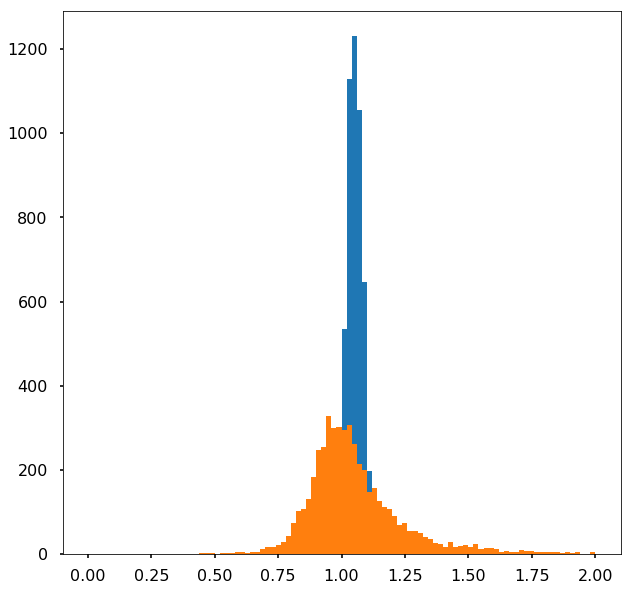

In [41]:
# y_pred.shape
_,bins,_ = plt.hist(y_pred[:,0],bins=100,range=[0,2]);
plt.hist(y_valid[:,0],bins=bins);

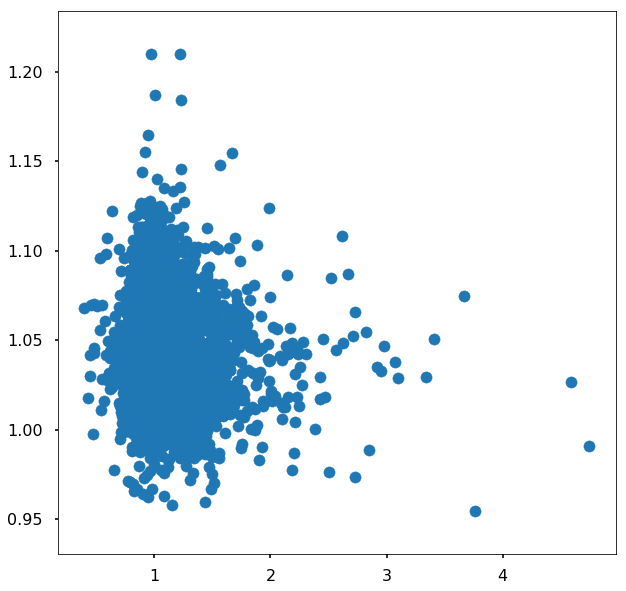

In [42]:
plt.scatter(y_valid,y_pred[:,0])

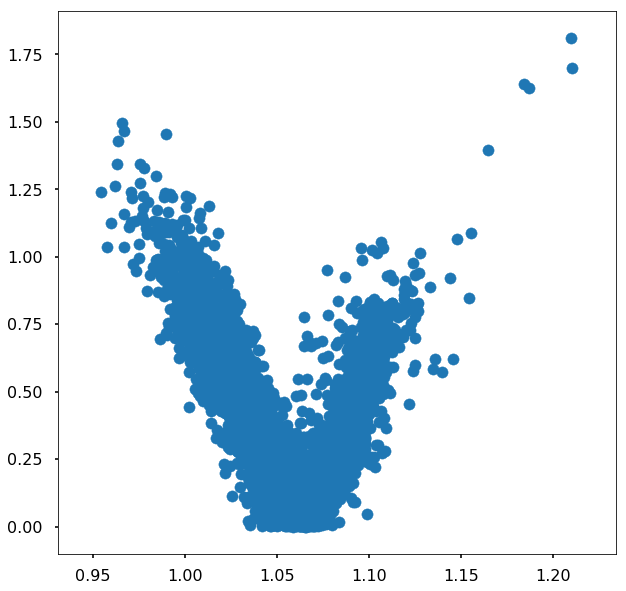

In [44]:
plt.scatter(y_pred[:,0],np.abs(y_pred[:,1]));